In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
from pathlib import Path

In [3]:
img_mean = (238, 231, 234)  # from all train data

In [4]:
data_dir = Path('/workspace/data/images_page_4_fixed/')
filenames = sorted(list(data_dir.glob('**/*.png')))

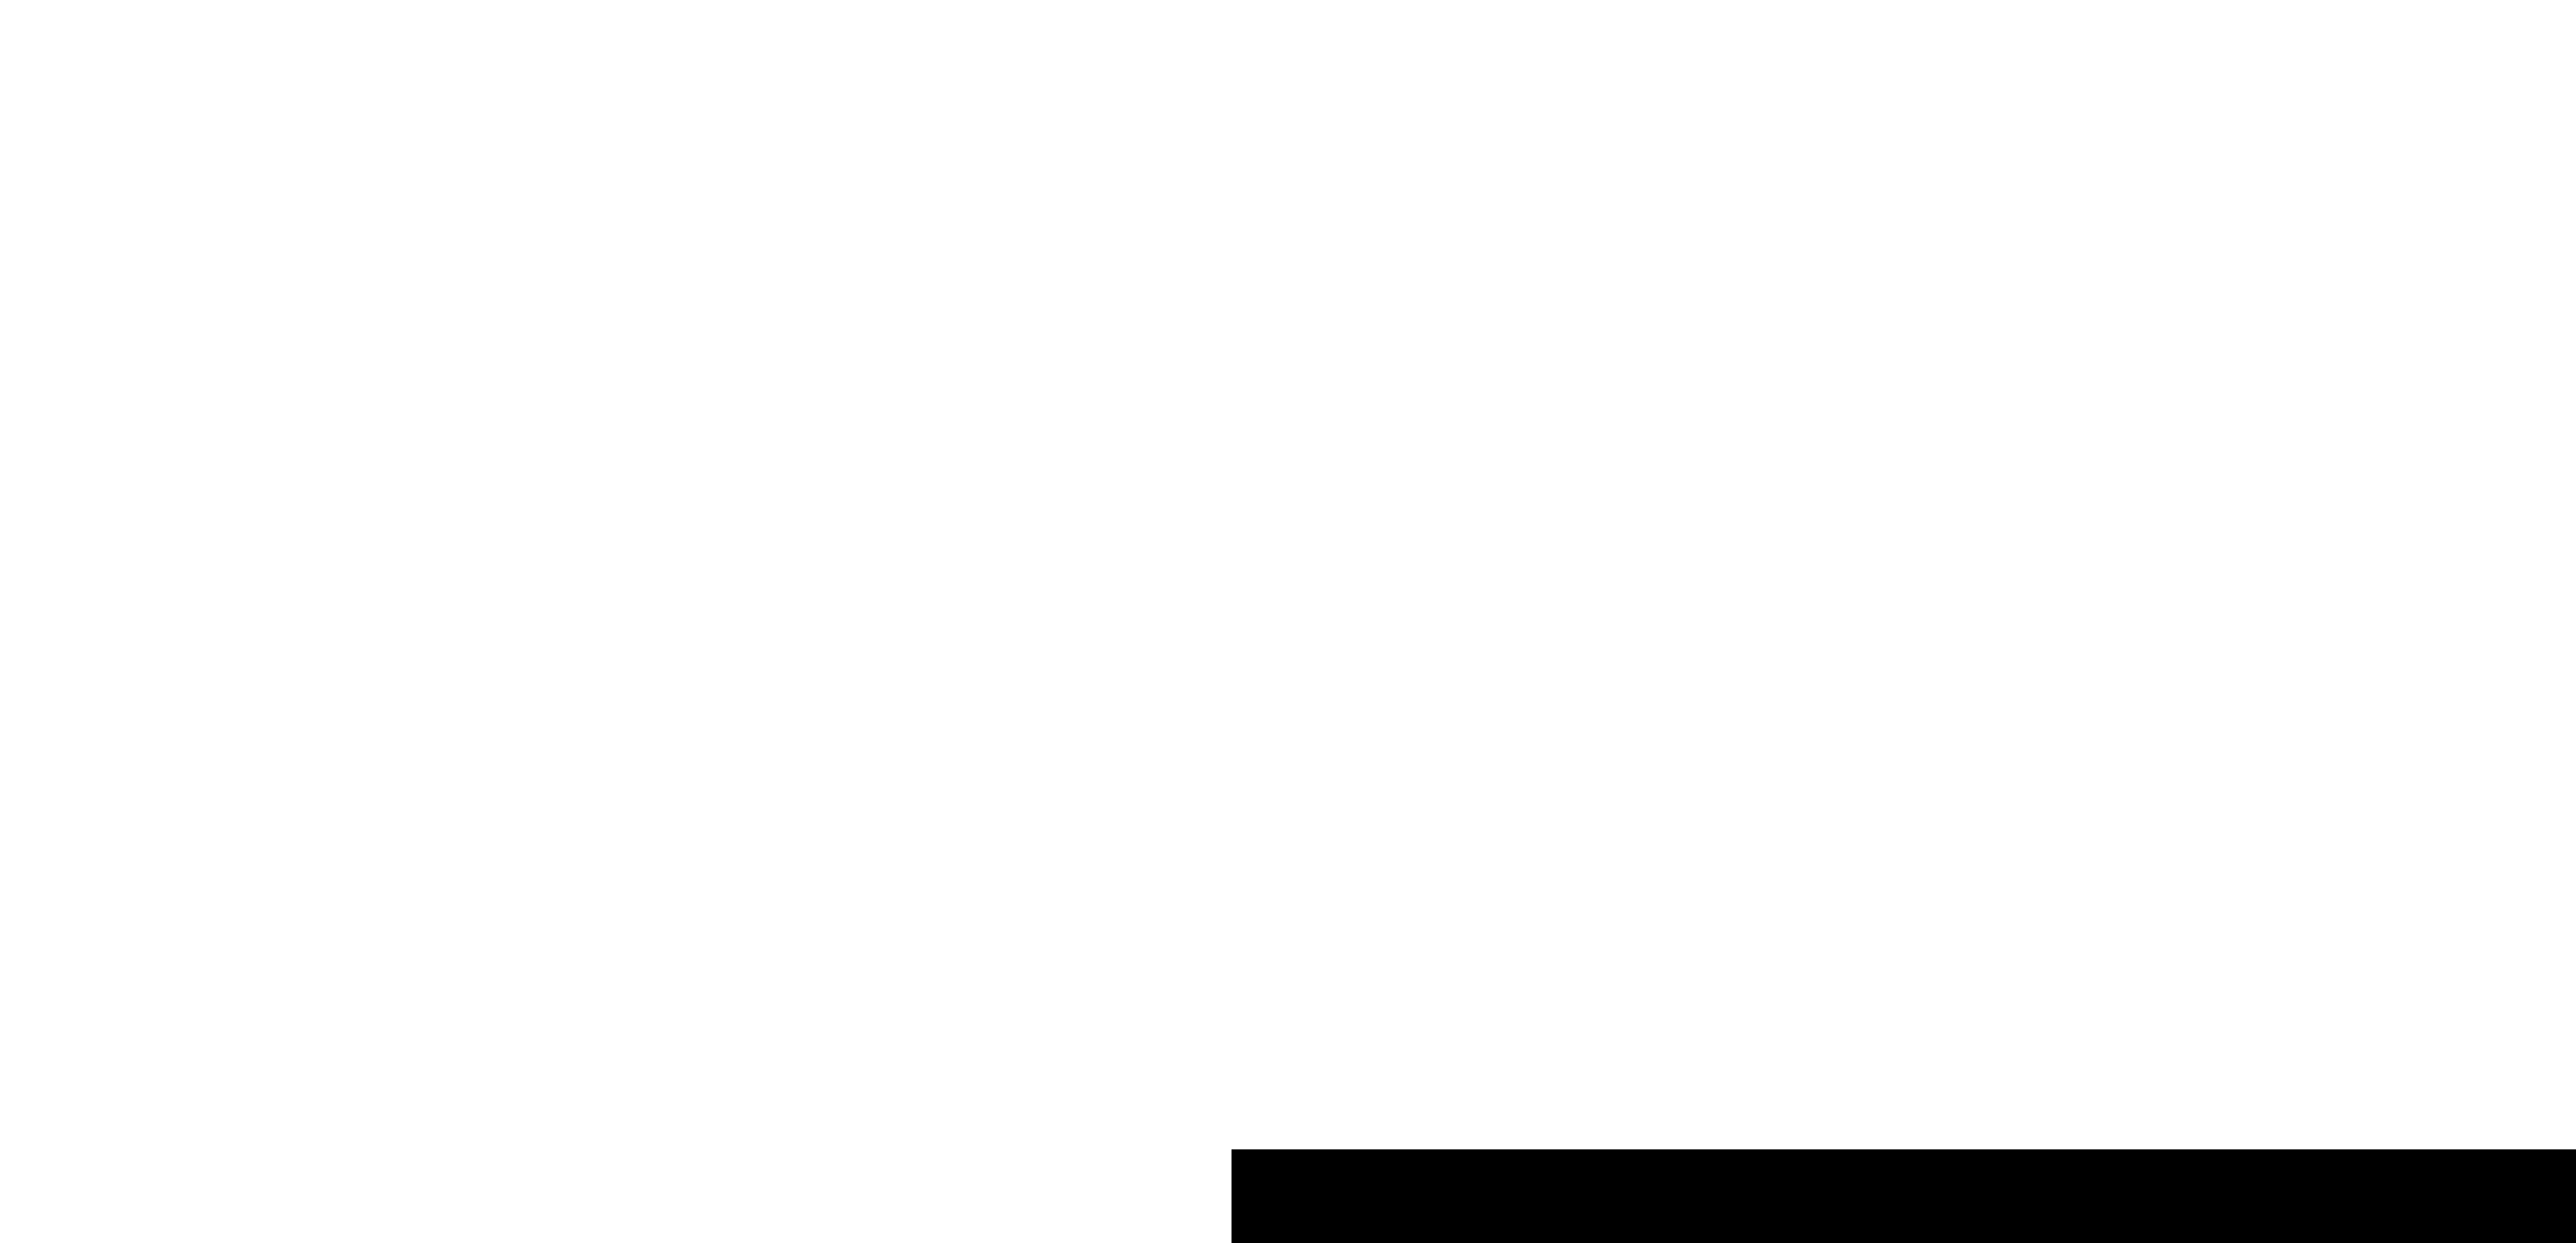

In [5]:
img = Image.open(filenames[0])
Image.fromarray(np.array(img)[:, :, -1])

In [6]:
np.array(img)[:, :, -1]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

[0, 15, 6]


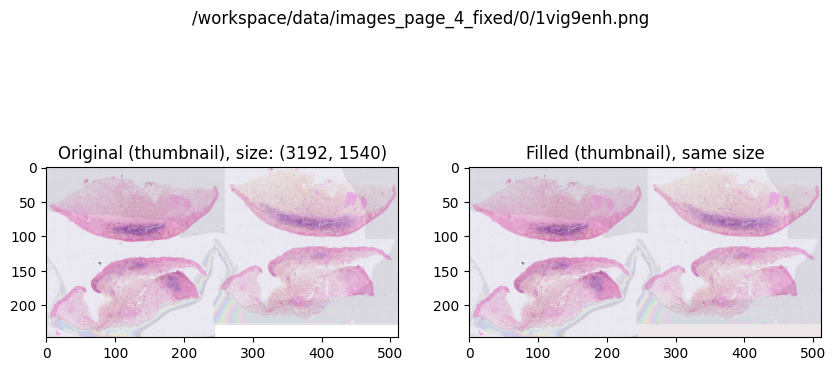

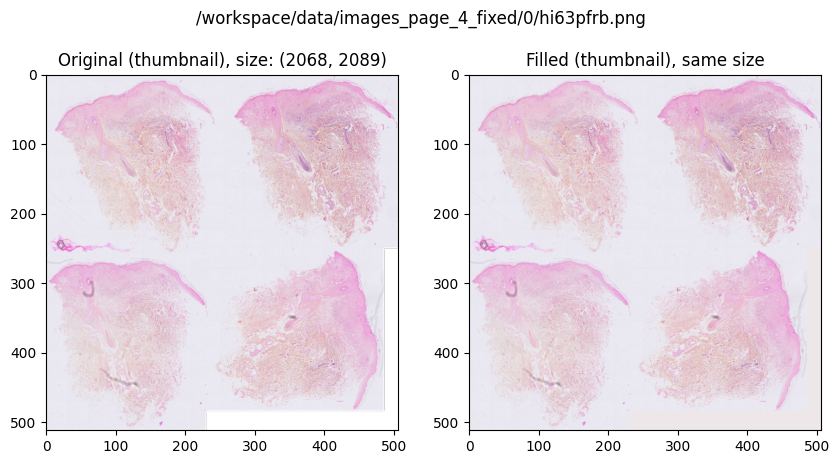

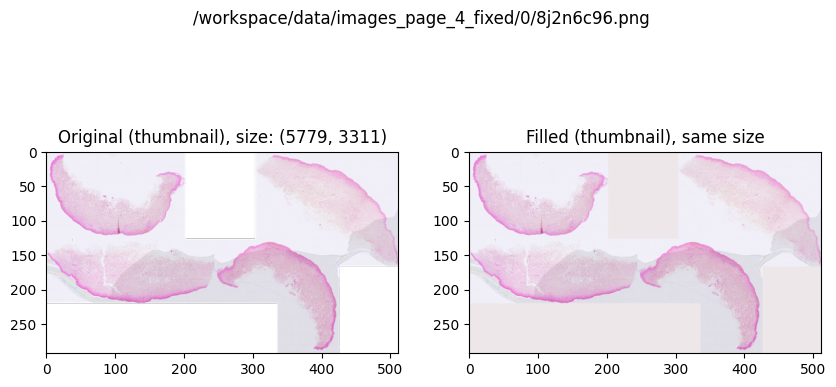

In [7]:
# indices = np.random.choice(len(filenames), 3, replace=False)
indices = [0, 15, 6]
print(indices)

for index in indices:
    # Plot 4 panels: 
    # - original (resized keeping aspect), 
    # - after pre_transform, 
    # - after train_transform, 
    # - after val_transform
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes = axes.flatten()

    img = Image.open(filenames[index])
    img_resized = img.copy()
    img_resized.thumbnail([512, 512], Image.LANCZOS)

    img_filled = img.copy()
    img_filled = np.array(img_filled)
    img_filled = np.where(
        (img_filled[:, :, 3] == 0)[:, :, None],
        np.array(img_mean)[None, None, :],
        img_filled[:, :, :3]
    ).astype(np.uint8)
    img_filled = Image.fromarray(img_filled)
    img_filled_resized = img_filled.copy()
    img_filled_resized.thumbnail([512, 512], Image.LANCZOS)

    fig.suptitle(filenames[index])
    axes[0].imshow(img_resized)
    axes[0].set_title(f'Original (thumbnail), size: {img.size}')
    axes[1].imshow(img_filled_resized)
    axes[1].set_title(f'Filled (thumbnail), same size')

In [12]:
np.array(img).shape

(1643, 1222, 3)

In [14]:
for filename in filenames:
    # Plot 4 panels: 
    # - original (resized keeping aspect), 
    # - after pre_transform, 
    # - after train_transform, 
    # - after val_transform
    img = Image.open(filename)

    img_filled = img.copy()
    img_filled = np.array(img_filled)
    if img_filled.shape[2] < 4:
        print(f'skipping {filename}, shape: {img_filled.shape}')
        continue
    img_filled = np.where(
        (img_filled[:, :, 3] == 0)[:, :, None],
        np.array(img_mean)[None, None, :],
        img_filled[:, :, :3]
    ).astype(np.uint8)
    img_filled = Image.fromarray(img_filled)

    img_filled.save(filename)

skipping /workspace/data/images_page_4_fixed/0/1vig9enh.png, shape: (1540, 3192, 3)
skipping /workspace/data/images_page_4_fixed/0/61wseljn.png, shape: (816, 1842, 3)
skipping /workspace/data/images_page_4_fixed/0/6235nfns.png, shape: (4229, 6992, 3)
skipping /workspace/data/images_page_4_fixed/0/6gt1vaty.png, shape: (1929, 6453, 3)
skipping /workspace/data/images_page_4_fixed/0/7nyiq3xw.png, shape: (1643, 1222, 3)
skipping /workspace/data/images_page_4_fixed/0/qrimite8.png, shape: (7701, 5192, 3)
skipping /workspace/data/images_page_4_fixed/0/rdslu5i5.png, shape: (5732, 5534, 3)
skipping /workspace/data/images_page_4_fixed/0/vif6zvk6.png, shape: (886, 441, 3)
skipping /workspace/data/images_page_4_fixed/1/peesbo3q.png, shape: (4084, 8252, 3)


/tmp/ipykernel_249069/3027730239.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


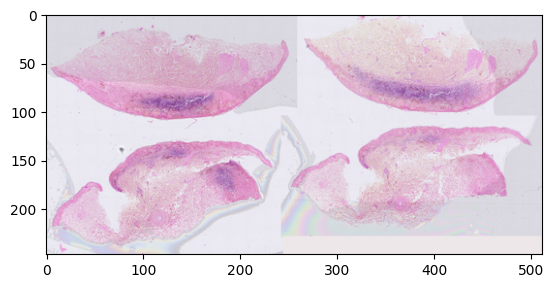

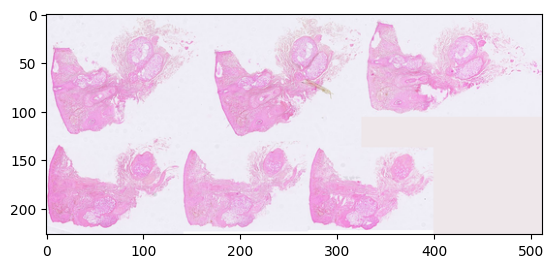

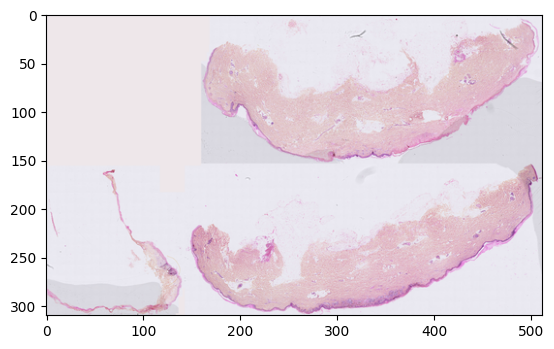

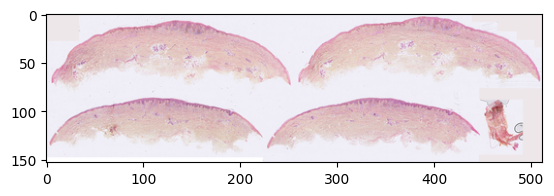

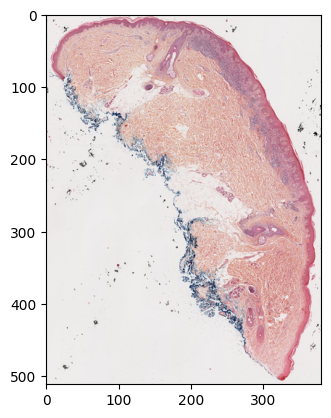

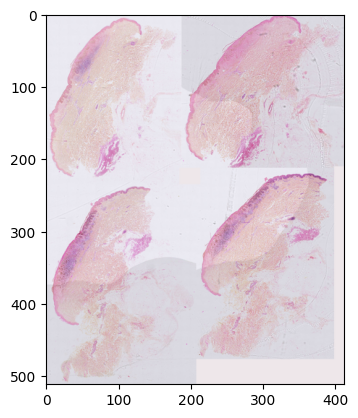

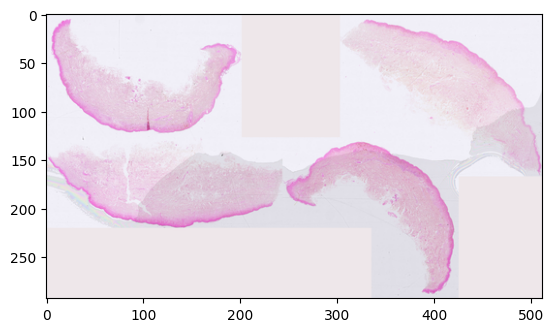

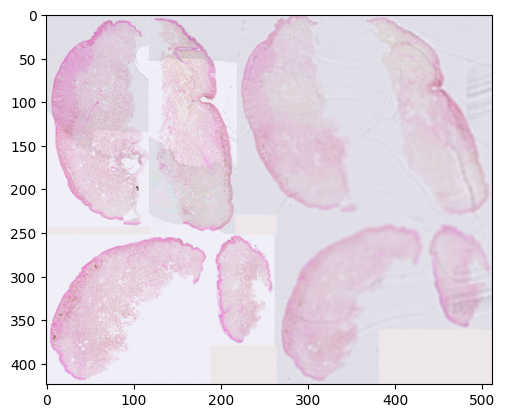

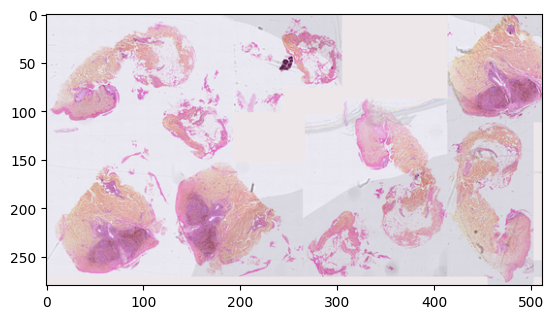

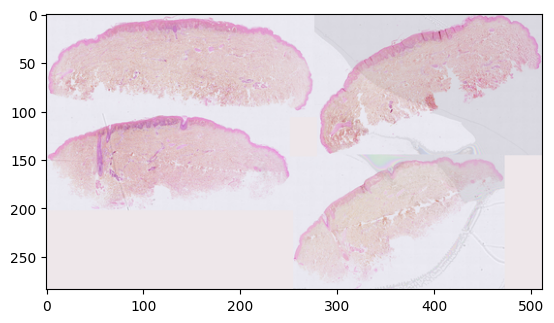

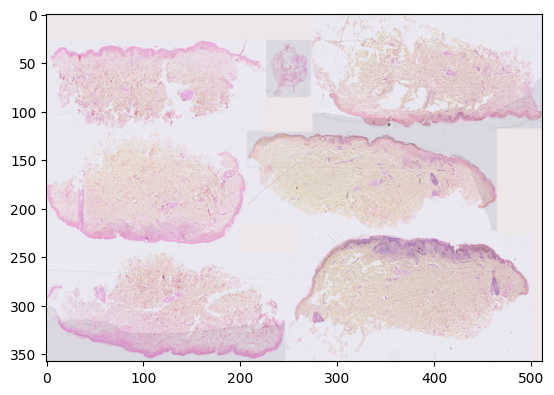

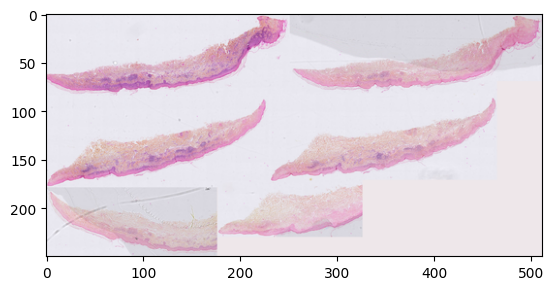

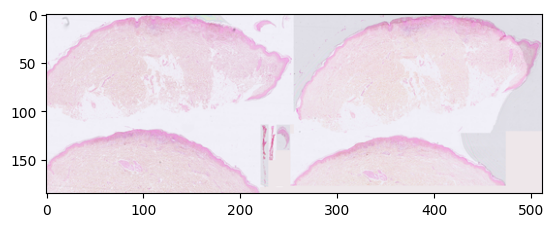

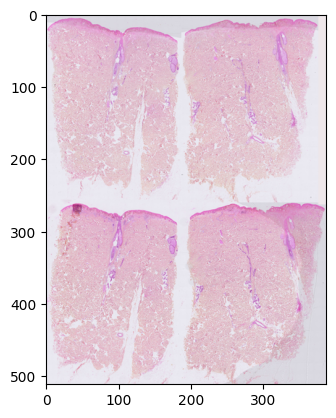

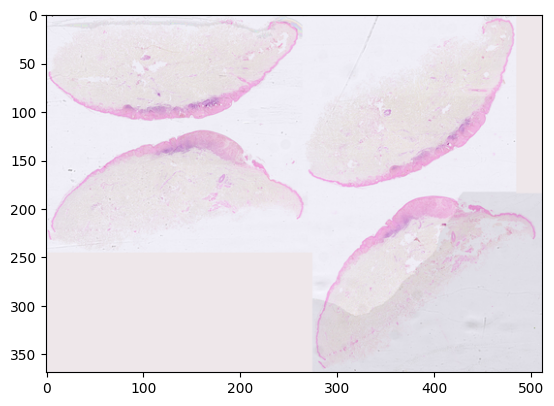

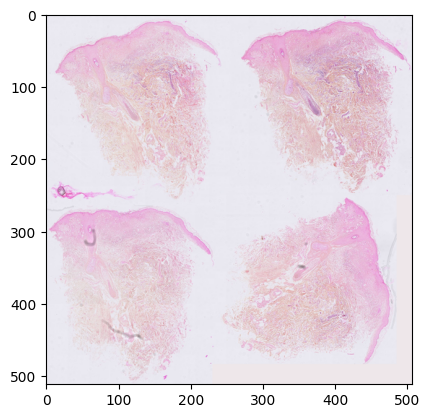

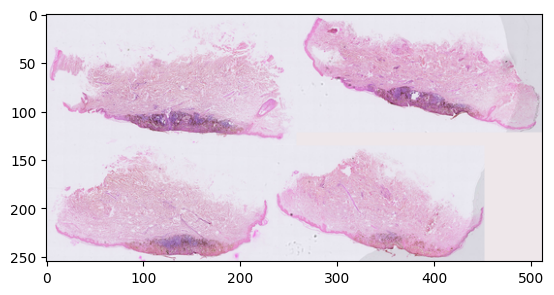

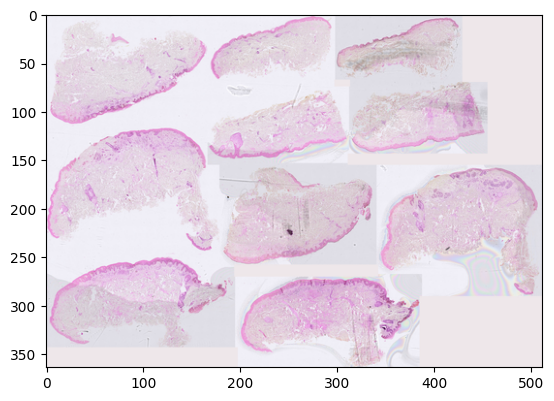

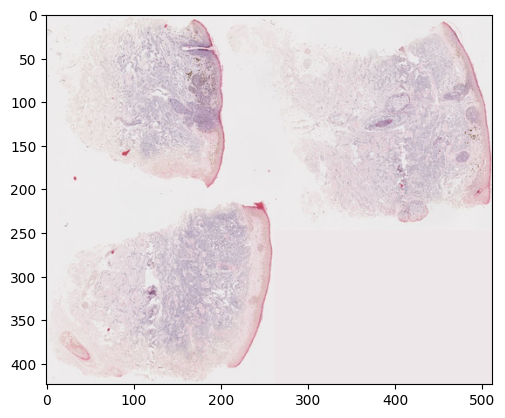

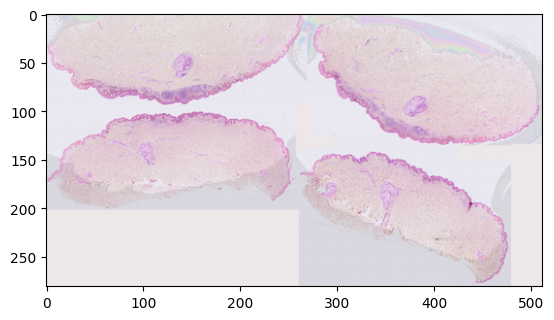

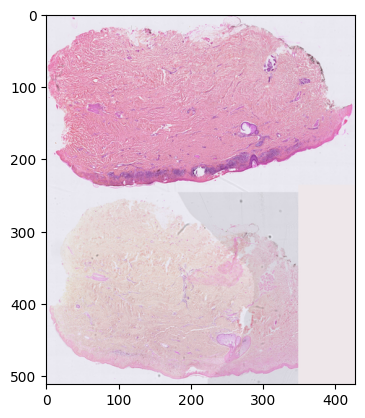

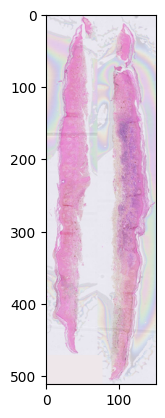

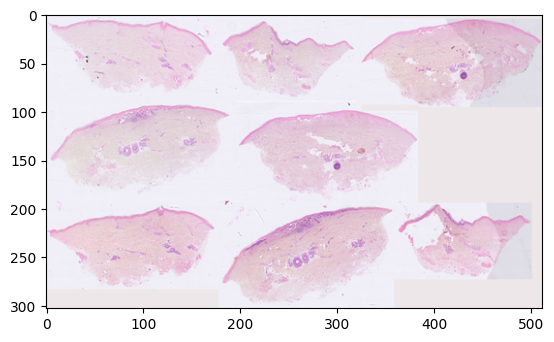

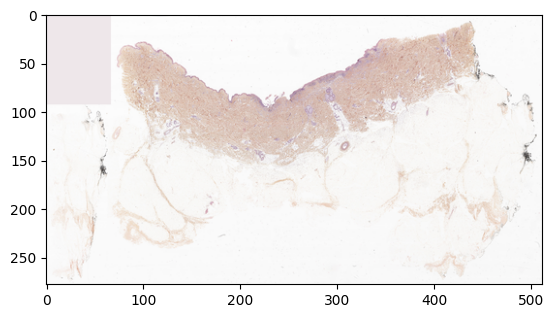

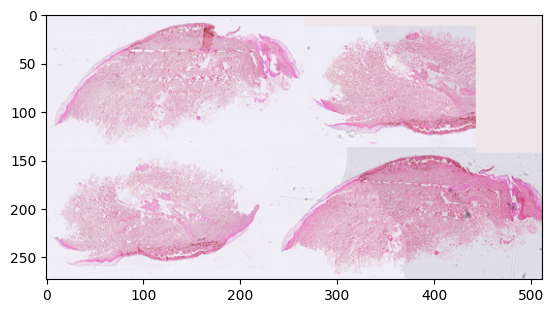

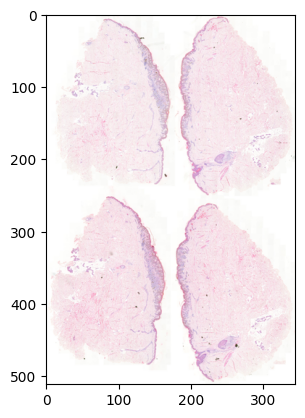

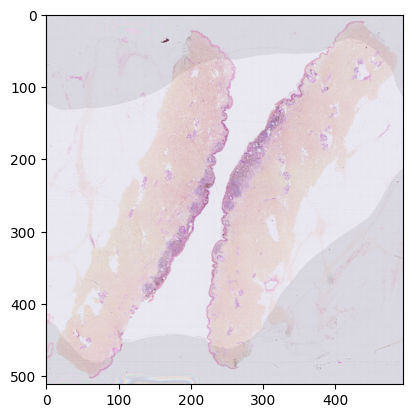

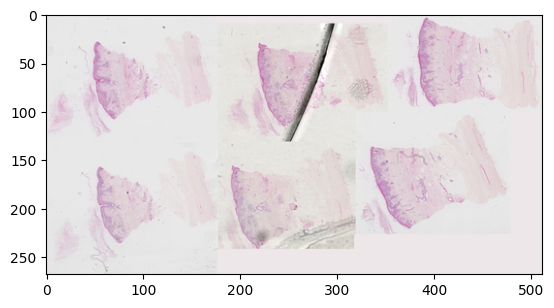

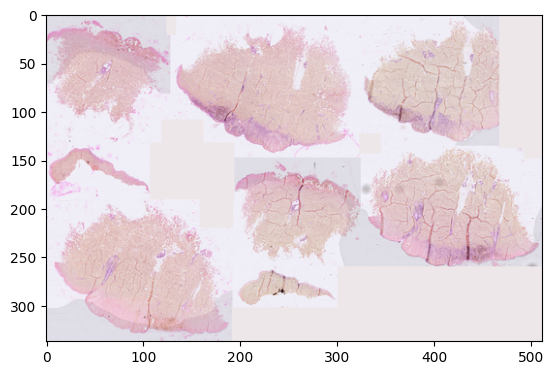

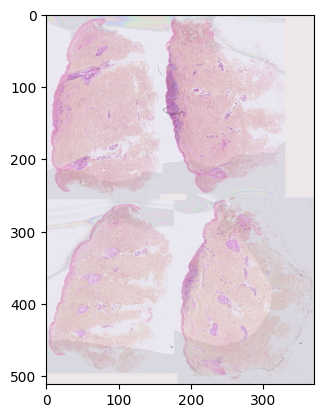

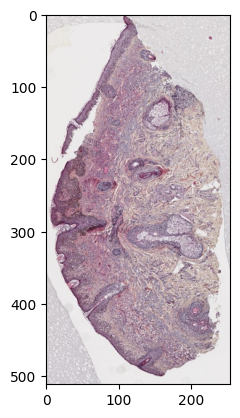

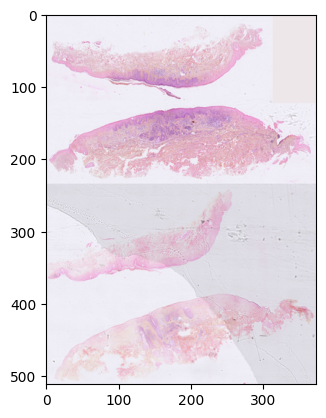

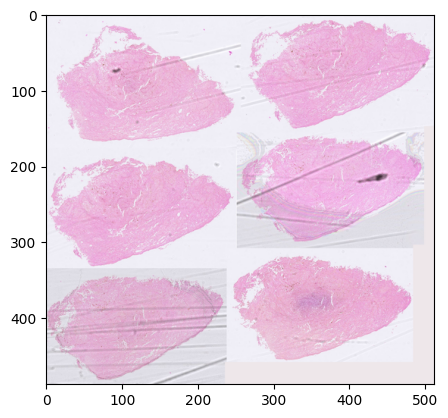

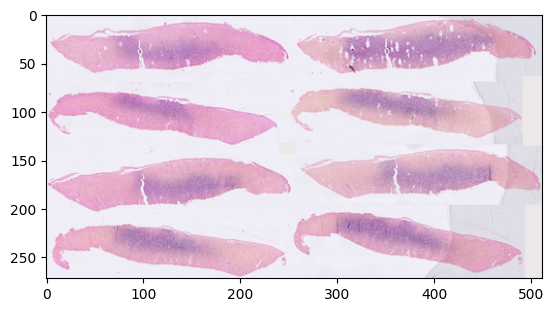

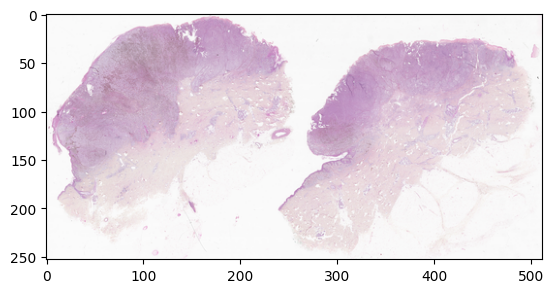

In [17]:
plt.close('all')
for filename in filenames:
    img = Image.open(filename)
    img_resized = img.copy()
    img_resized.thumbnail([512, 512], Image.LANCZOS)
    plt.figure()
    plt.imshow(img_resized)